In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
uefa_df = pd.read_csv('data/uefa.com/uefa_stats.csv') # stats from uefa website
standings = pd.read_csv('data/other/table.csv') # table with standings +
results =  pd.read_csv('data/other/results.csv') # all league phase match results

In [14]:
team_map = {
'results' : {
    'AC Milan':'MIL',
    'Arsenal':'ARS',
    'Aston Villa':'AVL',
    'Atalanta':'ATA',
    'Atlético de Madrid':'ATM',
    'Barcelona':'BAR',
    'Bayer Leverkusen':'BO4',
    'Bayern München':'MUN',
    'Benfica':'BEN',
    'Bologna':'BOL',
    'Borussia Dortmund':'BVB',
    'Brest':'BRE',
    'Celtic':'CEL',
    'Club Brugge':'BRU',
    'Crvena Zvezda':'RSB',
    'Feyenoord':'FEY',
    'GNK Dinamo':'DZG',
    'Girona':'GIR',
    'Inter':'INT',
    'Juventus':'JUV',
    'Leipzig':'RBL',
    'Lille':'LILL',
    'Liverpool':'LIV',
    'Manchester City':'MNC',
    'Monaco':'MON',
    'PSV Eindhoven':'PSV',
    'Paris Saint-Germain':'PSG',
    'Real Madrid':'RMA',
    'Salzburg':'SLZ',
    'Shakhtar Donetsk':'SHK',
    'Slovan Bratislava':'SLV',
    'Sparta Praha':'SPP',
    'Sporting CP':'SCP',
    'Sturm Graz':'STG',
    'Stuttgart':'VFB',
    'Young Boys':'YB'
},
'uefa_df': {
    'Bayern München':'MUN',
    'Man City':'MNC',
    'Paris':'PSG',
    'PSV':'PSV',
    'Stuttgart': 'VFB',
    'Atalanta':'ATA',
    'Leverkusen':'B04',
    'Liverpool':'LIV',
    'Real Madrid':'RMA',
    'Barcelona':'BAR',
    'Milan':'MIL',
    'B. Dortmund':'BVB',
    'Arsenal':'ARS',
    'Aston Villa':'AVL',
    'Benfica':'BEN',
    'Sporting CP':'SCP',
    'Inter':'INT',
    'Brest':'BRE',
    'Leipzig':'RBL',
    'Atleti':'ATM',
    'Monaco':'MON',
    'Crvena Zvezda':'RSB',
    'Bologna':'BOL',
    'Club Brugge':'BRU',
    'Juventus':'JUV',
    'Feyenoord':'FEY',
    'Celtic':'CEL',
    'Young Boys':'YB',
    'Girona':'GIR',
    'Lille':'LILL',
    'GNK Dinamo':'DZG',
    'Shakhtar':'SHK',
    'Salzburg':'SLZ',
    'Sparta Praha':'SPP',
    'Sturm Graz':'STG',
    'S. Bratislava':'SLV'
}}

In [20]:
uefa_df['symbol'] = uefa_df['Team'].map(team_map['uefa_df'])
results['home symbol'] = results['home'].map(team_map['results'])
results['away symbol'] = results['away'].map(team_map['results'])


In [62]:
master_df = uefa_df.merge(standings, left_on='symbol', right_on='team' )
master_df.drop(columns=['GP_y','GP_x','Country_x','team','name'], axis=1, inplace=True)
master_df.sort_values(by='standing',ascending=True, inplace=True)


In [63]:
master_df.columns
master_df.to_csv('data/master_table.csv')

In [67]:
cols = [
    'Team',
    'Total Attempts',
    'Attempts On Target',
    'Attempts Off Target',
    'Blocked',
    'Balls Recovered',
    'Tackles',
    'Tackles Won',
    'Tackles lost',
    'Clearances Attempted',
    'Passing Accuracy %',
    'Passes Attempted',
    'Passes Completed',
    'Possession',
    'Crossing Accuracy',
    'Crosses Attempted',
    'Crosses Completed',
    'Free-kicks Taken',
    'Saves',
    'Goals Conceded',
    'Own Goals Conceded',
    'Saves From Penalties',
    'Clean Sheets',
    'Punches made',
    'Goals',
    'Right Foot',
    'Left Foot',
    'Head',
    'Other',
    'Goals inside Area',
    'Goals outside Area',
    'Penalties Scored',
    'Country_y',
    'Attacks',
    'Assists',
    'Corners Taken',
    'Offsides',
    'Dribbles',
    'Country',
    'Fouls Commited',
    'Fouls Suffered',
    'Yellow Cards',
    'Red Cards',
    'symbol',
    'standing', 
    'W', 'D', 'L', 'F', 'A', 'GD', 'P'
]

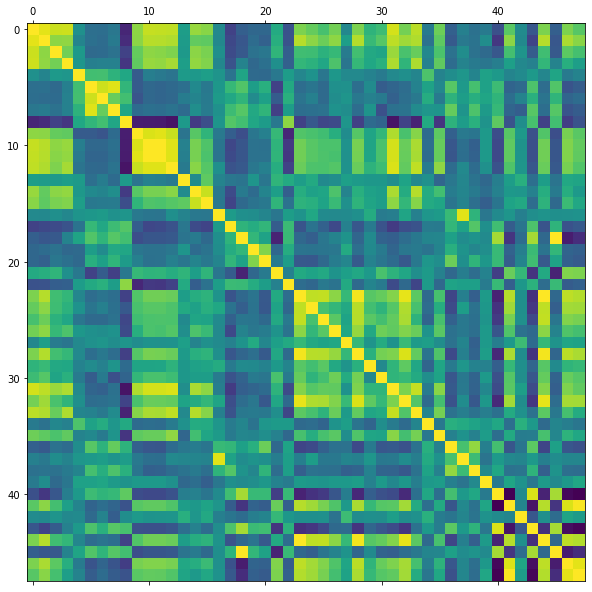

standing               -0.970164
L                      -0.943780
Goals Conceded         -0.712347
A                      -0.712347
Fouls Commited         -0.482126
Clearances Attempted   -0.468839
Saves                  -0.421277
Saves From Penalties   -0.405148
Tackles lost           -0.399333
Tackles                -0.389831
Own Goals Conceded     -0.365675
Punches made           -0.354813
Tackles Won            -0.273527
Yellow Cards           -0.262860
Offsides               -0.198064
Balls Recovered        -0.088201
Fouls Suffered         -0.066067
Free-kicks Taken        0.036939
Crosses Attempted       0.092000
D                       0.112416
Blocked                 0.133280
Other                   0.167633
Crossing Accuracy       0.178935
Red Cards               0.195819
Dribbles                0.200290
Crosses Completed       0.213244
Corners Taken           0.240091
Goals outside Area      0.348893
Head                    0.414655
Attempts Off Target     0.417848
Possession

In [92]:
# quick screen for correlations
plt.figure(figsize=(10,10))
master_corr = master_df.corr()
plt.matshow(master_df.corr(),fignum=1)
plt.show()
master_corr['P'].sort_values()

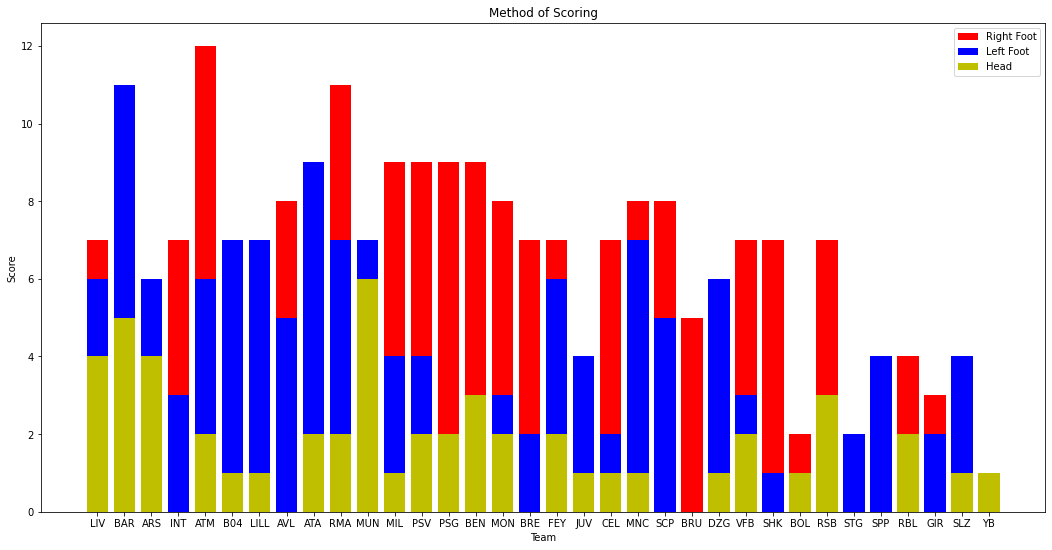

In [112]:
# lets do stacked bar charts for right foot/ left foot/ header goals
plt.subplots(figsize=(18,9),facecolor='white')
plt.bar(master_df.symbol, master_df['Right Foot'], color='r')
plt.bar(master_df.symbol, master_df['Left Foot'], color='b')
plt.bar(master_df.symbol, master_df['Head'], color='y')
plt.xlabel("Team")
plt.ylabel("Score")
plt.legend(["Right Foot", "Left Foot", "Head"])
plt.title("Method of Scoring")
plt.savefig('visualizations/method_of_scoring')
plt.show()



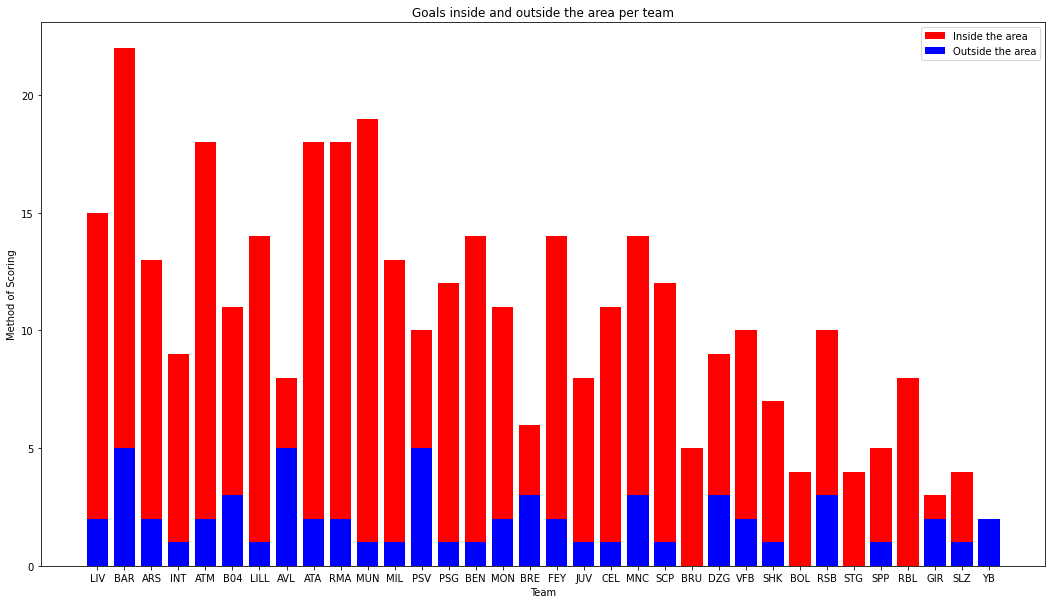

In [111]:
plt.subplots(figsize=(18,10),facecolor='white')
plt.bar(master_df.symbol, master_df['Goals inside Area'], color='r')
plt.bar(master_df.symbol, master_df['Goals outside Area'], color='b')
plt.xlabel("Team")
plt.ylabel("Method of Scoring")
plt.legend(["Inside the area", "Outside the area"])
plt.title("Goals inside and outside the area per team")
plt.savefig('visualizations/scoring_areas')
plt.show()

Text(0.5, 1.0, 'Histogram of points per team')

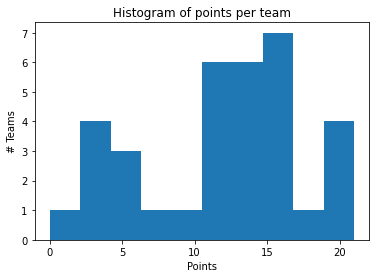

In [71]:
# not much insight here but was worth a shot
plt.hist(x=master_df.P, bins=10)
plt.xlabel("Points")
plt.ylabel("# Teams")
plt.title("Histogram of points per team")

In [93]:
# Normalization
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized_df = Normalizer.fit_transform(X=,y=)

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [30]:
# PCA?
from sklearn.decomposition import PCA

In [ ]:
# Exploration
